In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [5]:
df.shape


(1338, 7)

In [6]:
df.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

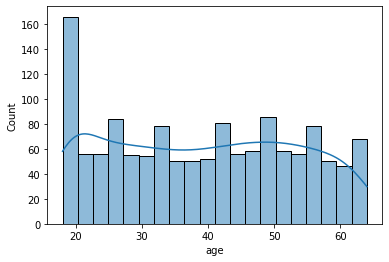

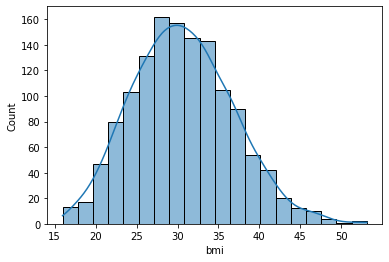

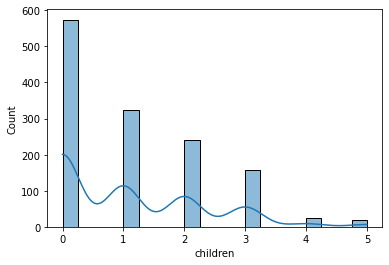

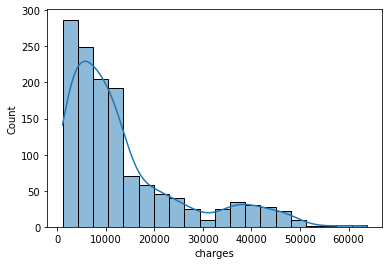

In [11]:
numeric_columns=['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    

<AxesSubplot:xlabel='children', ylabel='count'>

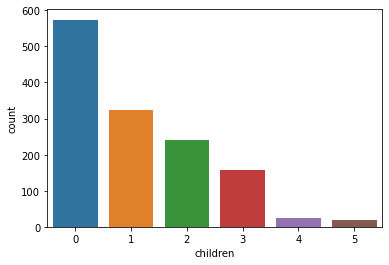

In [13]:
sns.countplot(x=df['children'])

<AxesSubplot:xlabel='sex', ylabel='count'>

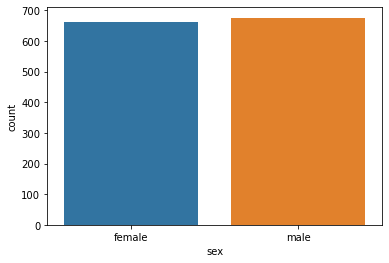

In [14]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

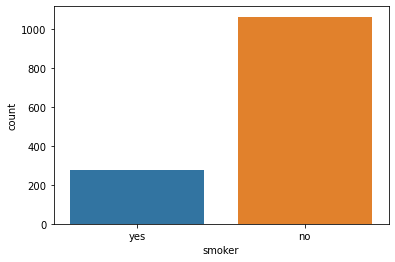

In [15]:
sns.countplot(df['smoker'])

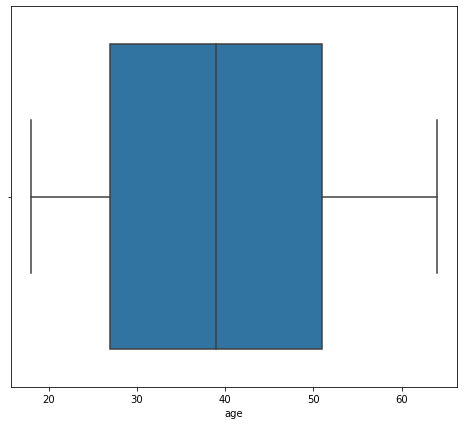

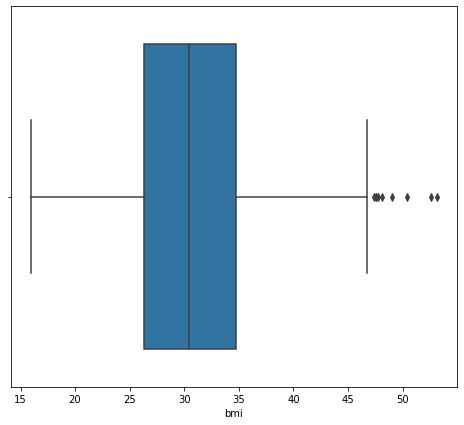

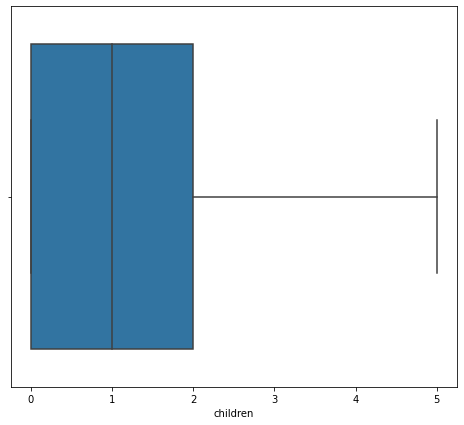

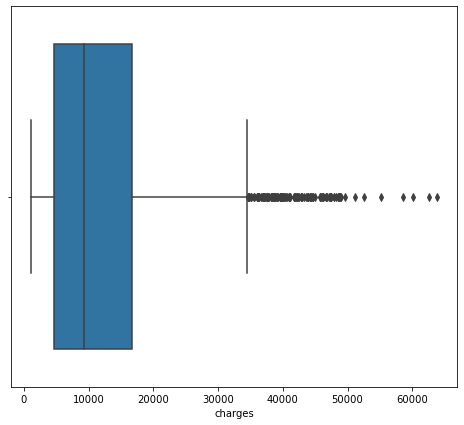

In [19]:
for col in numeric_columns:
    plt.figure(figsize=(8,7))
    sns.boxplot(x=df[col])

<AxesSubplot:>

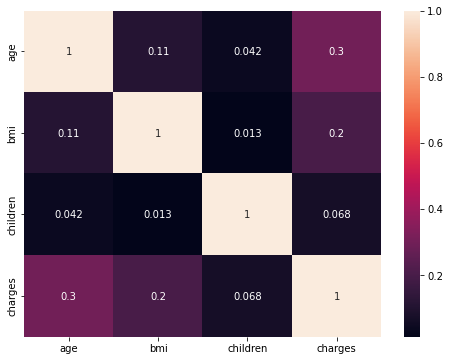

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

# Data Cleaning and Processing

In [24]:
df_clean=df.copy()

In [25]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df_clean.shape

(1338, 7)

In [28]:
df_clean.drop_duplicates(inplace=True)
df_clean.shape

(1337, 7)

In [29]:
df_clean.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
df_clean.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [32]:
df_clean['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [33]:
df_clean['sex']=df_clean['sex'].map({"male": 0, "female": 1})
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [34]:
df_clean['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [35]:
df_clean['smoker']=df_clean['smoker'].map({"no": 0, "yes": 1})
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [36]:
df_clean.rename(columns={
    'sex': "is_female",
    'smoker':"is_smoker",
    
}, inplace=True)

In [37]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [38]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [39]:
df_clean=pd.get_dummies(df_clean, columns=['region'], drop_first=True)
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


# Feature Engineering and Extraction

<AxesSubplot:xlabel='bmi', ylabel='Count'>

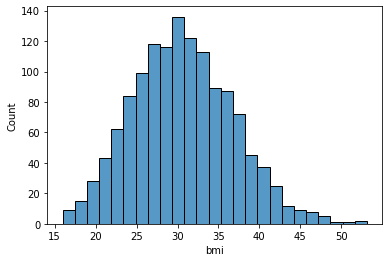

In [40]:
sns.histplot(df['bmi'])

In [41]:
df_clean['bmi_category']= pd.cut(
    df_clean['bmi'],
    bins=[0,18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [42]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,0,0,1,Overweight
1,18,0,33.770,1,0,1725.55230,0,1,0,Obese
2,28,0,33.000,3,0,4449.46200,0,1,0,Obese
3,33,0,22.705,0,0,21984.47061,1,0,0,Normal
4,32,0,28.880,0,0,3866.85520,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0,Obese
1334,18,1,31.920,0,0,2205.98080,0,0,0,Obese
1335,18,1,36.850,0,0,1629.83350,0,1,0,Obese
1336,21,1,25.800,0,0,2007.94500,0,0,1,Overweight


In [43]:
df_clean=pd.get_dummies(df_clean, columns=['bmi_category'], drop_first=True)
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,1,16884.92400,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0,0,1,0


In [44]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

# Feature Scaling 

In [45]:
from sklearn.preprocessing import StandardScaler
cols=['age', 'bmi', 'children']
scaler=StandardScaler()

df_clean[cols]=scaler.fit_transform(df_clean[cols])


In [46]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0,1,0,1,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,0,1,0,0,0,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,0,1,0,0,0,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,1,0,0,1,0,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,1,0,0,0,1,0


In [48]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

correlations = {
    feature: pearsonr(df_clean[feature], df_clean['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298308
1,bmi,0.198401
10,bmi_category_Obese,0.197659
6,region_southeast,0.073578
2,children,0.067389
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058044
8,bmi_category_Normal,-0.105655


In [49]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [50]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_clean['charges_bin'] = pd.qcut(df_clean['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_clean[col], df_clean['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219,1.50748e-183,Reject Null (Keep Feature)
region_southeast,15.9982,0.00113497,Reject Null (Keep Feature)
is_female,10.2588,0.0164897,Reject Null (Keep Feature)
bmi_category_Obese,7.65446,0.0537197,Accept Null (Drop Feature)
region_southwest,5.09189,0.165191,Accept Null (Drop Feature)
bmi_category_Normal,4.26367,0.234364,Accept Null (Drop Feature)
bmi_category_Overweight,4.20158,0.240504,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [52]:
final_df = df_clean[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obese']]
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,1,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,1,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,0,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,0.050269,1.580143,0,10600.54830,0,1
1334,-1.511647,1,0.206053,-0.909234,0,2205.98080,0,1
1335,-1.511647,1,1.014490,-0.909234,0,1629.83350,1,1
1336,-1.297958,1,-0.797524,-0.909234,0,2007.94500,0,0
